## Automobile_Insurance_Claim dataset

This is the dataset which gives the information of claim amount for the individual on the basis of other factors given here such as stae,coverage,education and many more.Our target variable here ids to calculate the claim amount allowed to individual.
I have collected the following dataset from github link(https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects).

Importing numpy and pandas for data operations,matplotlib and seaborn for visualization process and sklearn libraries modules for data shaping and metrics evaluation

In [1]:
#importing the required libraries and metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#importing warnings to suppress while execution
import warnings
warnings.filterwarnings('ignore')

In [2]:
#accesing the dataset to the dataframe
c=pd.read_csv('C:/Users/hp/Downloads/DSData-master/Auto_Insurance_Claims_amount.csv')
claim=pd.DataFrame(c)

#take a look for the structure of data
claim.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [3]:
#lets see the counts of values in each columns
for col in claim.columns:
    print(claim[col].value_counts())

XX88364    1
DY27653    1
LY17372    1
BZ44726    1
HN69035    1
          ..
NC80854    1
ZO14864    1
RY44243    1
JA25453    1
HC74532    1
Name: Customer, Length: 9134, dtype: int64
US    9134
Name: Country, dtype: int64
MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64
Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64
472.686933     6
272.535640     6
575.744226     6
592.672938     6
1216.874492    6
              ..
919.868511     1
287.543239     1
623.430592     1
910.389970     1
816.951398     1
Name: Claim Amount, Length: 8041, dtype: int64
No     7826
Yes    1308
Name: Response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
1/10/11    195
1/27/11    194
2/14/1

From the above data,we observe that Customer column has unique id for each columns,country columns has only one data throughout the dataset,state & state code column has same data and effective to date is not necessary as we have month data,so lets drop these three columns to reduce complexity

In [4]:
claim.drop(['Customer','Country','State','Effective To Date'],axis=1,inplace=True)

In [5]:
#lets see the shapeof dataset
claim.shape

(9134, 22)

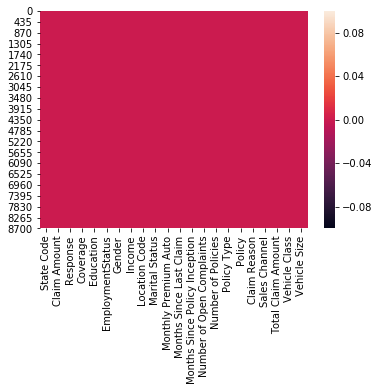

In [6]:
#checking for any null values
sns.heatmap(claim.isnull())

#It seems there is no null data in the dataset

In [7]:
#Lets check for the datatype of each column
claim.dtypes

State Code                        object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [8]:
claim.skew()

Claim Amount                     3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64

In [9]:
#we get some skewed values more than 0.55,so we need to adjust
for index in claim.skew().index:
    if claim.skew().loc[index]>0.55:
        claim[index]=np.log1p(claim[index])

Data Visualisation

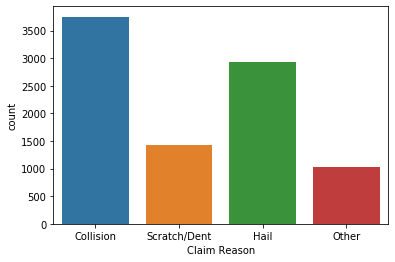

In [10]:
#Lets check the countplot of claim reasons
sns.countplot(claim['Claim Reason'])

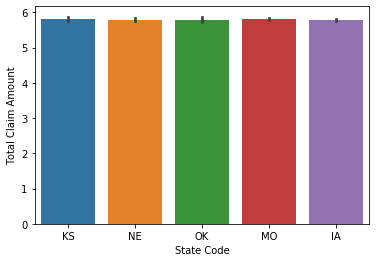

In [11]:
#Lets check the total claim amount
sns.barplot(x="State Code",y="Total Claim Amount",data=claim)

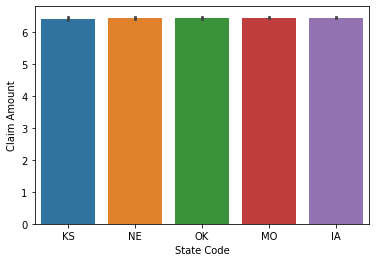

In [12]:
#Lets check the total claim amount
sns.barplot(x="State Code",y="Claim Amount",data=claim)

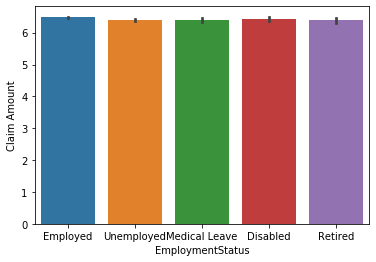

In [13]:
#lets plot for the average claim amount based on employment status
sns.barplot(x="EmploymentStatus",y="Claim Amount",data=claim)

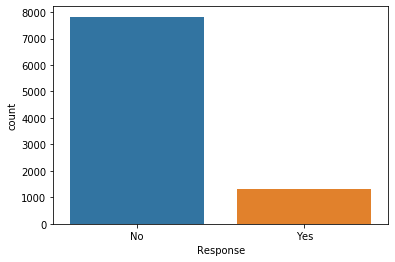

In [14]:
#plotting countplot for response
sns.countplot(claim['Response'])

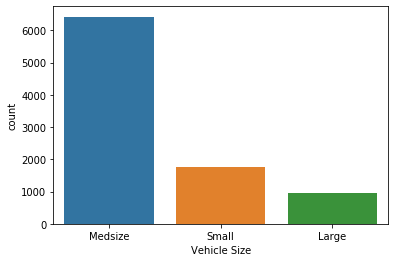

In [15]:
sns.countplot(claim['Vehicle Size'])

#it shows medsize vehicle holders claim is more than others

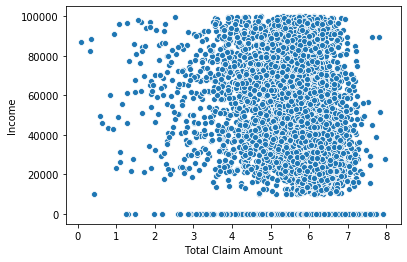

In [16]:
#scatterplot b/w total claim amount and income
sns.scatterplot(x='Total Claim Amount',y='Income',data=claim)

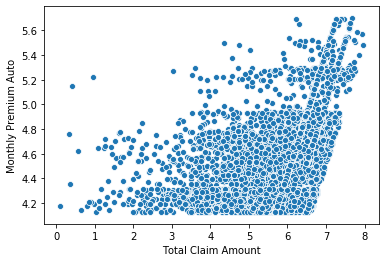

In [17]:
#scatterplot b/w total claim amount and monthly premium auto
sns.scatterplot(x='Total Claim Amount',y='Monthly Premium Auto',data=claim)

In [18]:
#getting the correlation among data
claim.corr()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.041918,0.461131,0.009432,0.001316,-0.037972,0.309314,0.156762
Income,0.041918,1.000000,-0.017724,-0.026715,-0.000875,0.006318,-0.008837,-0.343448
Monthly Premium Auto,0.461131,-0.017724,1.000000,0.000938,0.018493,-0.012700,-0.014197,0.385665
Months Since Last Claim,0.009432,-0.026715,0.000938,1.000000,-0.042959,0.006318,0.010327,-0.007423
Months Since Policy Inception,0.001316,-0.000875,0.018493,-0.042959,1.000000,-0.007300,-0.011720,-0.002544
Number of Open Complaints,-0.037972,0.006318,-0.012700,0.006318,-0.007300,1.000000,0.001690,-0.013442
Number of Policies,0.309314,-0.008837,-0.014197,0.010327,-0.011720,0.001690,1.000000,-0.000035
Total Claim Amount,0.156762,-0.343448,0.385665,-0.007423,-0.002544,-0.013442,-0.000035,1.000000


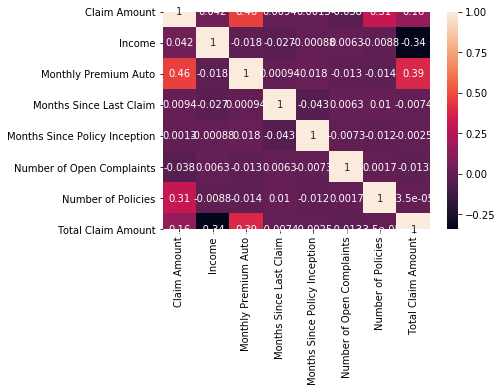

In [19]:
#plotting heatmap for corrlation for visual clarification
sns.heatmap(claim.corr(),annot=True)

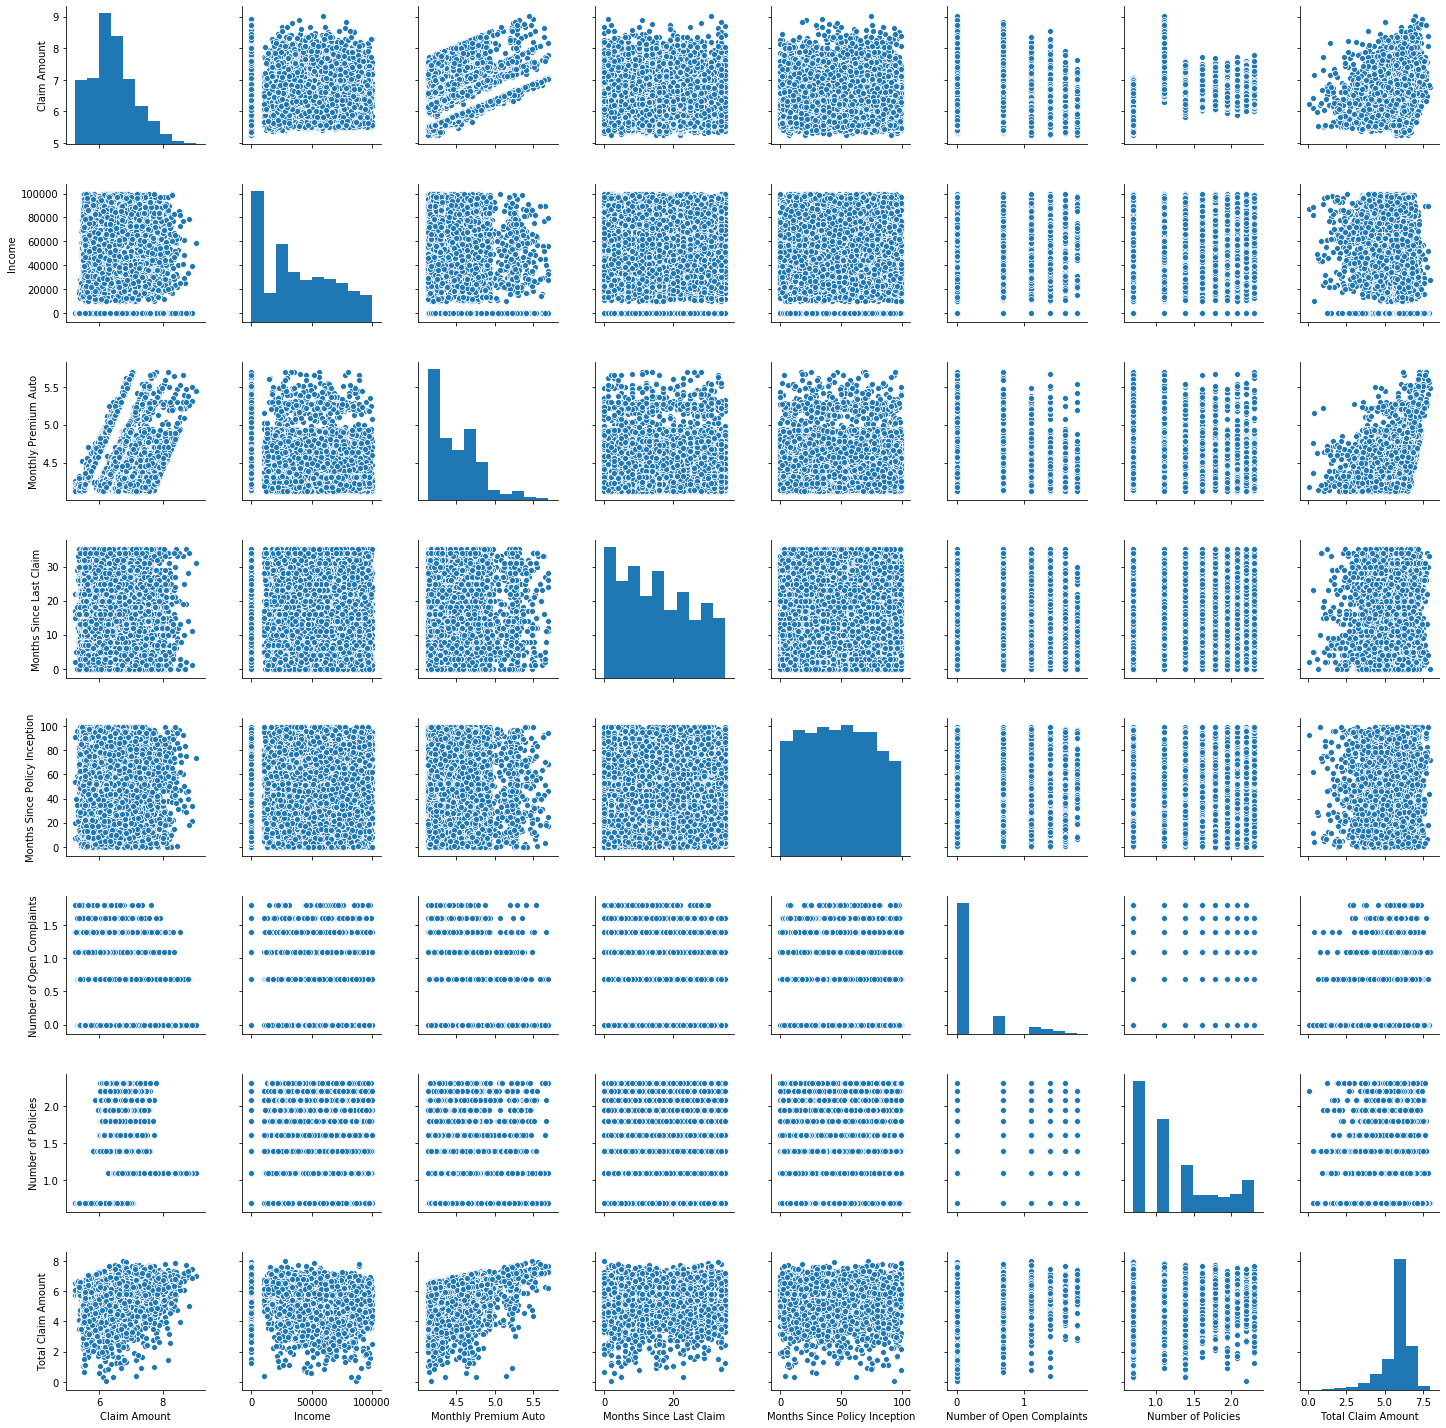

In [20]:
#pairplot for the data
sns.pairplot(claim)

Statistical summary of data

In [21]:
claim.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,6.447889,37657.380009,4.494058,15.097000,48.064594,0.203262,1.226869,5.797731
std,0.651891,30379.904734,0.304920,10.073257,27.905991,0.429742,0.526663,0.896576
min,5.251230,0.000000,4.127134,0.000000,0.000000,0.000000,0.693147,0.094407
25%,5.992527,0.000000,4.234107,6.000000,24.000000,0.000000,0.693147,5.610417
50%,6.361334,33889.500000,4.430817,14.000000,48.000000,0.000000,1.098612,5.953102
75%,6.799297,62320.000000,4.700480,23.000000,71.000000,0.000000,1.609438,6.307214
max,9.028043,99981.000000,5.700444,35.000000,99.000000,1.791759,2.302585,7.970478


It shows the presence of outliers in most of the columns here,so we need to handle it

In [22]:
#using labelencoder to convert all the object type columns to int
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in claim.columns:
    if claim[col].dtypes=="object":
        claim[col]=le.fit_transform(claim[col])

In [23]:
#lets see the dataset structure now
claim.head()

,State Code,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1,5.625287,0,0,0,1,0,56274,1,1,...,5,0.0,0.693147,0,2,0,0,5.955348,5,1
1,3,6.549584,0,1,0,4,0,0,1,2,...,42,0.0,2.197225,1,5,3,0,7.032152,0,1
2,4,7.162198,0,2,0,1,0,48767,1,1,...,38,0.0,1.098612,1,5,0,0,6.341192,5,1
3,2,6.640642,0,0,0,4,1,0,1,1,...,65,0.0,2.079442,0,1,0,2,6.274539,3,1
4,1,5.643216,0,0,0,1,1,43836,0,2,...,44,0.0,0.693147,1,3,0,0,4.935415,0,1


In [24]:
#importing zscore to handle outliers
from scipy.stats import zscore
z=np.abs(zscore(claim))
claim_new=claim[(z<3).all(axis=1)]
claim_new.shape

(8625, 22)

Amost 600 rows are shrinked by applying zscore,so take this modified data as final dataset

In [25]:
claim=claim_new

Shaping the data for machine learning

We have two columns claim amount and total claim amount,I am selecting claim amount as my target variable because it seems more feasible to select it from visualization above.

In [26]:
x=claim.drop('Claim Amount',axis=1)
y=claim['Claim Amount']

In [27]:
#creating function to determine random state
def random(alg):
    r_state=0
    for r_score in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        r2scr=r2_score(y_test,pred)
        if r2scr > r_state:
            r_state=r2scr
            final_r=r_score
    print(r2scr,'at',final_r)

In [28]:
#creating the function for algorithm operations
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    print('mean_squared_error=',mean_squared_error(y_test,pred))
    print('mean_absolute_error=',mean_absolute_error(y_test,pred))
    print('r2_score=',r2_score(y_test,pred))
    print('root_mean_squared_error=',np.sqrt(mean_squared_error(y_test,pred)))

In [29]:
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print(score)
    print(score.mean())
    print(score.std())

Lets start applying algorithm one by one.

Linear Regression

In [30]:
# using Linear regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
random(lm)

0.28981547604743896 at 64


In [31]:
#getting cross_val_score
cross_val(lm)

[0.27849494 0.28777721 0.30624368 0.30100921 0.28154517]
0.2910140402934961
0.01085089702972881


In [32]:
#lets try for decison tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
random(dtr)

0.8125988066895774 at 67


Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

#getting n_estimators using gridsearchcv
parameters={'n_estimators':[10,100,500]}
grid=GridSearchCV(rfr,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_estimators': 500}

In [34]:
rfr=RandomForestRegressor(n_estimators=500)
random(rfr)

0.9086477422885839 at 67


In [37]:
cross_val(rfr)

[0.91074769 0.91313249 0.90384819 0.91847272 0.90821478]
0.9108831759685703
0.004884471576708291


Gradient Boosting Regressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

#getting best parameters using gridsearch
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500]}
grid=GridSearchCV(gbr,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [36]:
gbr=GradientBoostingRegressor(n_estimators=500)
random(gbr)

0.9026278499734863 at 66


In [38]:
cross_val(gbr)

[0.90365531 0.91404882 0.90091579 0.90940598 0.90328772]
0.9062627223115769
0.00479045380308382


From the above solved algorithms,I get the best score from random forest regressor above all,so i am selecting random_forest_regressor as my best fit algorithm for this dataset.

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=67)
model(rfr)

mean_squared_error= 0.03424580275755531
mean_absolute_error= 0.08734445006844159
r2_score= 0.9145151716043989
root_mean_squared_error= 0.18505621512814777


In [41]:
#saving the model
from sklearn.externals import joblib
joblib.dump(rfr,'rfr_InsuranceClaim.pkl')

['rfr_InsuranceClaim.pkl']

## Conclusion

This dataset is all about predicting the claim ammount on the contrary of other features provided above.after importing the datset,I checked for the value_counts for each columns and datatypes.I dropped some unnecessary columns and also replaced categorical features to labels using labelEncoder.I checked for the skewed values in data and adjusted them.I plots various graphs and subplots b/w diffrent features to get the data insights.Check describe to see the statistical summary and imported zscore for outliers.
After this complete preprocessing,I shaped the data for machine learning process.After checking for some algorithms,I get the best fit model as a random forest regressor.